In [1]:
from keras.datasets import fashion_mnist
import numpy as np 
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
print(type(X_train),X_train.shape)

4431872/4422102 [==============================] - 2s 0us/step
<class 'numpy.ndarray'> (60000, 28, 28)


In [2]:
#样本可视化
img1 = X_train[0]
print(img1)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

Text(0.5, 1.0, 'raw img 1')

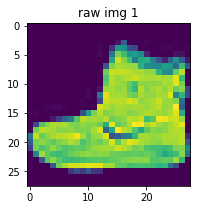

In [3]:
#引入画图包
from matplotlib import pyplot as plt
fig1=plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title('raw img 1')

In [4]:
#输入数据预处理
feature_size = img1.shape[0]*img1.shape[1]
print(feature_size)
X_train_format = X_train.reshape(X_train.shape[0],784)
X_test_format = X_test.reshape(X_test.shape[0],feature_size)
print(X_train_format.shape,X_train.shape)

784
(60000, 784) (60000, 28, 28)


In [5]:
#数据的归一化处理
X_train_normal = X_train_format/255
X_test_normal = X_test_format/255
print(X_train_normal[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

In [6]:
print(X_train_format[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1
   1   1   0 200 232 232 233 229 223 223 215 213 16

In [8]:
#输出结果数据的预处理
from tensorflow.keras.utils import to_categorical
y_train_format = to_categorical(y_train)
y_test_format = to_categorical(y_test)
print(y_train_format[0])
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


In [9]:
print(y_train.shape,y_train_format.shape)

(60000,) (60000, 10)


In [10]:
#建立mlp模型
from keras.models import Sequential
from keras.layers import Dense, Activation
mlp = Sequential()
mlp.add(Dense(units = 392, input_dim=784, activation = 'relu'))
mlp.add(Dense(units = 196, activation = 'relu'))
mlp.add(Dense(units = 10, activation='softmax'))
mlp.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dense_2 (Dense)             (None, 10)                1970      
                                                                 
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [11]:
#参数配置
mlp.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [12]:
#模型训练
mlp.fit(X_train_normal,y_train_format,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4731 - categorical_accuracy: 0.8282
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3572 - categorical_accuracy: 0.8680
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3203 - categorical_accuracy: 0.8812
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2950 - categorical_accuracy: 0.8904
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2788 - categorical_accuracy: 0.8956
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2629 - categorical_accuracy: 0.9012
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2508 - categorical_accuracy: 0.9057
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2404 - categorical_accuracy: 0.9087
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2295 - cat

In [19]:
#结果预测
y_train_predict=np.argmax(mlp.predict(X_train_normal),axis=-1)
print(y_train_predict[0:10])
print(type(y_train_predict))

[9 0 0 3 3 2 7 4 5 5]
<class 'numpy.ndarray'>


In [20]:
from sklearn.metrics import accuracy_score
accuracy_train=accuracy_score(y_train,y_train_predict) #注意这里不需要将y_train转化为onehot格式
print(accuracy_train)

0.9254833333333333


In [21]:
y_test_predict = np.argmax(mlp.predict(X_test_normal),axis=-1)
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_test)

0.8868


In [22]:
#创建结果标签字典
label_dict={0:'T shirt',1:'裤子',2:'套头衫',3:'裙子',4:'外套 ',5:'凉鞋',6:'衬衫',7:'运动鞋',8:'包 ',9:'踝靴'}
print(label_dict)

{0: 'T shirt', 1: '裤子', 2: '套头衫', 3: '裙子', 4: '外套 ', 5: '凉鞋', 6: '衬衫', 7: '运动鞋', 8: '包 ', 9: '踝靴'}


Text(0.5, 1.0, '包 ')

C:\Users\Administrator\anaconda3\envs\deeplearningCV\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21253 (\N{CJK UNIFIED IDEOGRAPH-5305}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


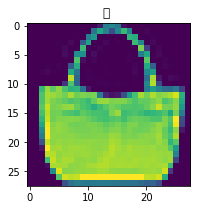

In [23]:
#出现RuntimeWarning: Glyph 39057 missing from current font.的解决办法：
#import matplotlib as mpl
#mpl.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
#mpl.rcParams['font.size'] = 12  # 字体大小
#mpl.rcParams['axes.unicode_minus'] = False  # 正常显示负号

#样本可视化
img1=X_train[100]
fig2=plt.figure(figsize=(3,3))
plt.imshow(img1)
plt.title(label_dict[y_train_predict[100]])

In [24]:
label_dict[y_train_predict[100]]

'包 '

[1, 2, 3, 4, 5, 6, 7, 8, 9]


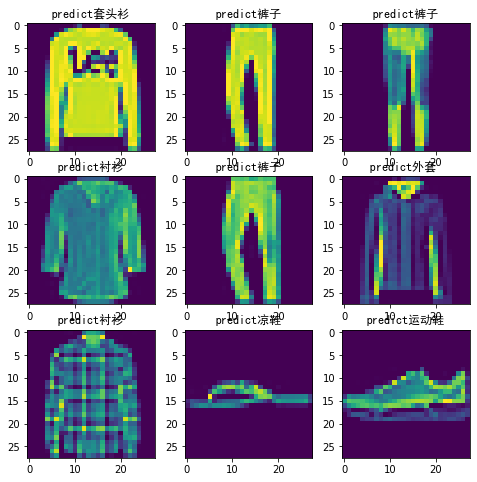

In [25]:
a=[i for i in range(1,10)]
print(a)
fig4=plt.figure(figsize=(8,8))
font2={'family':'SimHei'} 
for i in a:
    plt.subplot(3,3,i)
    plt.imshow(X_test[i])
    plt.title('predict{}'.format(label_dict[y_test_predict[i]]),font2)